## Лабораторная работа №8
## ИНТЕРПОЛИРОВАНИЕ КУБИЧЕСКИМИ СПЛАЙНАМИ

Цель работы: научиться решать задачу построения кубического сплайна.Для функции, заданной таблично, построить кусочно-полиномиальный сплайн.

### Постановка задачи:
1.	Построить кубический интерполяционный сплайн для заданной системы точек используя Python.

### Содержание отчета:
1.	Постановка задачи
2.	Таблица значений функции.
3.	Теоретические сведения.
4.	Листинги счета на ЭВМ.
5.	Выводы.


### Теоретические сведения
Интерполяционный полином не всегда дает хороший результат. Например, аппроксимация резонансных кривых колебательных систем дает большую погрешность как на концах кривых (крыльях), так и между узлами. При увеличении степени интерполяционного полинома погрешность только возрастает (явление волнистости). Широкое распространение для решения задачи интерполяции получает аппарат сплайнов. Рассмотрим интерполяцию кубическими сплайнами. В отличии от интерполяции полиномом на каждом участке строится отдельный сплайн.  
Пусть на отрезке $[a, b]$ имеется таблично заданая функция $a= x_{0}<x_{1}<...<x_{n} =b.$ Шаг таблицы может быть непостоянным.   
Постановка задачи: На отрезке $[a, b]$ необходимо найти функцию g(x), которая удовлетворяет следующим требованиям:
1. Сплайн $g(x)$ принадлежит классу $c2(a,b)$, т.е. $g(x),g'(x),g''(x)$  непрерывны на отрезке $[a,b],$ график $g(x)$ не имеет острых углов (т.к. $g'(x)$ непрерывна), радиус кривизны определен в каждой точке.
2. На каждом  участке $g(x)$  является  кубическим   полиномом  III степени, т.е. $$g(x) \equiv  g_{k}(x)= \sum_{i=0}^{3} a_{i}^{(k)} ( x_{k} -x)^{i}= ( a_{0} )^{(k)} +( a_{1} )^{(k)}( x_{k} -x) + ( a_{2} )^{(k)} ( x_{k} -x)^{2} +( a_{3} )^{(k)} ( x_{k} -x)^{3}, $$  , 
где ai(k) – коэффициенты сплайна, которые определимы из допол-нительных условий: $ k= \overline{(1...n)}$ – номер сплайна.  
3. Выполняется основное условие интерполяции:

    $$g( x_{k} )=f( x_{k} ) \forall k= \overline{(1...n)}. $$  
    
    
4. Вторая производная $g''(x)$ удовлетворяет граничным условиям. В общем случае эти условия зависят от конкретной задачи. Довольно часто используется условие свободных концов сплайнов, а именно $g''(a) = g''(b) = 0.$  
В результате построения с соблюдением всех условий будем иметь  

$$g(x) =  m_{k-1}  \frac{ ( x_{k} -x)^{3} }{6 h_{k} } +  m_{k} \frac{ (x- x_{k-1} )^{2} }{6 h_{k} }  + ( f_{k-1}- m_{k-1} \frac{  ( h_{k} )^{2} }{6}   )( \frac{ x_{k} -x}{ h_{k} } ) + ( f_{k}- m_{k} \frac{ ( h_{k} )^{2} }{6}   ) \frac{x- x_{k-1} }{ h_{k} },k= \overline{1,n} .$$  

Для определения неизвестных $m_{0}...m_{n}$ используем непрерывность $ g'(x).$ В результате получим систему для определения $m_{k}$ с n-1 уравнением и n+1 неизвестными. Её нужно доопределить для однозначного решения. Дополняем систему граничными условиями, например условиями свободных концов сплайна $m_{0}=m_{n}=0.$  
Получаем систему n-1 уравнения с n-1 неизвестными:

$$  \begin{cases}\frac{ h_{1} + h_{2} }{3} m_{1}+\frac{ h_{2} }{6} m_{2}= \frac{ f_{0} }{ h_{1} }-( \frac{1}{ h_{1} } + \frac{1}{ h_{2} } ) f_{1} +  \frac{ f_{2} }{ h_{2} };\\ \frac{ h_{2} }{6} m_{1}+\frac{ h_{2} + h_{3} }{3} m_{2}+\frac{ h_{3} }{6} m_{3}= \frac{ f_{1} }{ h_{2} }-( \frac{1}{ h_{2} } +\frac{1}{ h_{3} }) f_{2} + \frac{ f_{3} }{ h_{3} }; \\ \frac{ h_{3} }{6} m_{2}+\frac{ h_{3} + h_{4} }{3} m_{3}+\frac{ h_{4} }{6} m_{4}= \frac{ f_{2} }{ h_{3} }-( \frac{1}{ h_{3} } +\frac{1}{ h_{4} }) f_{3} + \frac{ f_{4} }{ h_{4} };\\--------------------------------------\\ \frac{ h_{n-1} }{6} m_{n-2}+\frac{ h_{n-1} + h_{n} }{3} m_{n-1}= \frac{ f_{n-2} }{ h_{n-1} }+( \frac{1}{ h_{n-1} } +\frac{1}{ h_{n} }) f_{n-1} + \frac{ f_{n} }{ h_{n} }.\end{cases} $$  
В матричном виде систему можно записать следующим образом:
$$A \overline{m} =H \overline{f},$$  
где 
![title](img/matrix.png)
Матрица А – неособенная матрица, система для определения m имеет единственное решение, следовательно, сплайн-функция $g(x)$ однозначно восстанавливается, т.е. задача о нахождении кусочно-кубической функции $g(x)$ имеет единственное решение. Решение системы может быть найдено с помощью метода прогонки (частный случай метода Гаусса) или каким-либо другим способом. 

### Пример
Интерполирование кубическим сплайном используя Python.

## Руководство по Python

Основная информация о Python:
https://www.python.org/doc/

Numpy и SciPy:
https://docs.scipy.org/doc/

Графика в Python:
https://matplotlib.org/index.html

In [29]:
#подключение необходимых библиотек
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [30]:
#задание исходных данных
x = [4.1, 4.6, 5.2, 6.0, 6.2, 6.5]
y = [1.4110, 1.5261, 1.6487, 1.7918, 1.8245, 1.8718]

In [31]:
#задание стандартной функции для линейной интерполяции
f = interp1d(x, y)

In [32]:
#задание стандартной функции для интерполяции кубическими сплайнами
f2 = interp1d(x, y, kind='cubic')

In [33]:
#задаём массив исходных данных
xnew = np.linspace(4.1, 6.5, num=20, endpoint=True)

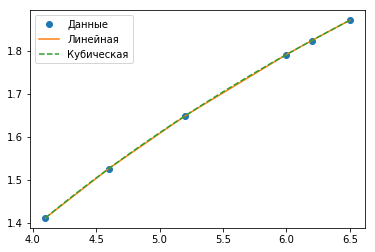

In [34]:
#применение функции interp1d для заданного массива и отображение результата при помощи графика
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['Данные', 'Линейная', 'Кубическая'], loc='best')
plt.show()